In [1]:
import pandas as pd
#import glob

In [2]:
'''
folder_path = "DataSet\\"

all_files = glob.glob(folder_path + '*.csv')

dfs = []

for file in all_files:
    df = pd.read_csv(file)
    dfs.append(df)

merged_df = pd.concat(dfs, ignore_index=True)
'''

'\nfolder_path = "DataSet\\"\n\nall_files = glob.glob(folder_path + \'*.csv\')\n\ndfs = []\n\nfor file in all_files:\n    df = pd.read_csv(file)\n    dfs.append(df)\n\nmerged_df = pd.concat(dfs, ignore_index=True)\n'

In [3]:
merged_df = pd.read_csv("DataSet\ADANIPORTS.csv")
merged_df

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2007-11-27,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.00,959.0,962.90,984.72,27294366,2.687719e+15,NaN,9859619,0.3612
1,2007-11-28,MUNDRAPORT,EQ,962.90,984.00,990.00,874.00,885.0,893.90,941.38,4581338,4.312765e+14,NaN,1453278,0.3172
2,2007-11-29,MUNDRAPORT,EQ,893.90,909.00,914.75,841.00,887.0,884.20,888.09,5124121,4.550658e+14,NaN,1069678,0.2088
3,2007-11-30,MUNDRAPORT,EQ,884.20,890.00,958.00,890.00,929.0,921.55,929.17,4609762,4.283257e+14,NaN,1260913,0.2735
4,2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.00,922.00,980.0,969.30,965.65,2977470,2.875200e+14,NaN,816123,0.2741
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3317,2021-04-26,ADANIPORTS,EQ,725.35,733.00,739.65,728.90,729.2,730.75,733.25,9390549,6.885658e+14,116457.0,838079,0.0892
3318,2021-04-27,ADANIPORTS,EQ,730.75,735.00,757.50,727.35,748.6,749.15,747.67,20573107,1.538191e+15,236896.0,1779639,0.0865
3319,2021-04-28,ADANIPORTS,EQ,749.15,755.00,760.00,741.10,743.4,746.25,751.02,11156977,8.379106e+14,130847.0,1342353,0.1203
3320,2021-04-29,ADANIPORTS,EQ,746.25,753.20,765.85,743.40,746.4,746.75,753.06,13851910,1.043139e+15,153293.0,1304895,0.0942


In [4]:
data = merged_df.copy()

# Convert 'Date' column to datetime type
data['Date'] = pd.to_datetime(data['Date'])

# Sort DataFrame by 'Date'
data = data.sort_values('Date')

*Exploratory data analysis*:
1. Getting to know the data
2. Data preprocessing (Missing values)
3. Cross table and data visualization

***Getting to know the data***

In [5]:
#*****To check variables data type
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3322 entries, 0 to 3321
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                3322 non-null   datetime64[ns]
 1   Symbol              3322 non-null   object        
 2   Series              3322 non-null   object        
 3   Prev Close          3322 non-null   float64       
 4   Open                3322 non-null   float64       
 5   High                3322 non-null   float64       
 6   Low                 3322 non-null   float64       
 7   Last                3322 non-null   float64       
 8   Close               3322 non-null   float64       
 9   VWAP                3322 non-null   float64       
 10  Volume              3322 non-null   int64         
 11  Turnover            3322 non-null   float64       
 12  Trades              2456 non-null   float64       
 13  Deliverable Volume  3322 non-null   int64       

In [6]:
#*****Check for missing values
data.isnull()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3317,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3318,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3319,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3320,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
print('Data columns with null values:\n', data.isnull().sum())

Data columns with null values:
 Date                    0
Symbol                  0
Series                  0
Prev Close              0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
VWAP                    0
Volume                  0
Turnover                0
Trades                866
Deliverable Volume      0
%Deliverble             0
dtype: int64


In [8]:
#*****Subsetting the rows that have one or more missing values
missing = data[data.isnull().any(axis=1)]

### Two ways of approach:
1. Fill the missing values by mean/ median, in case of numerical variable.
2. Fill the missing values with the class which has maximum count, in case of categorical variable.

* Look at the description to know whether numerical variables should be imputed with mean or median.
* Generate descriptive statistics that summarize the central tendency, dispersion and shape of a dataset's distribution, excluding NaN values.

In [9]:
data.describe()

,Date,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,3322,3322.000000,3322.000000,3322.000000,3322.000000,3322.000000,3322.000000,3322.000000,3.322000e+03,3.322000e+03,2.456000e+03,3.322000e+03,3322.000000
mean,2014-08-14 03:47:08.416616448,344.114314,344.763019,351.608007,337.531969,344.239539,344.201626,344.853182,2.954564e+06,1.070144e+14,4.492259e+04,1.207441e+06,0.445899
min,2007-11-27 00:00:00,108.000000,108.000000,110.450000,105.650000,108.000000,108.000000,108.340000,1.236600e+04,2.415857e+11,3.660000e+02,5.383000e+03,0.067000
25%,2011-04-07 06:00:00,164.312500,164.850000,168.000000,161.600000,164.075000,164.312500,164.855000,7.493682e+05,1.817650e+13,2.083200e+04,3.212005e+05,0.332900
50%,2014-08-06 12:00:00,324.700000,325.750000,331.275000,319.850000,325.000000,324.700000,325.765000,2.007292e+06,5.836041e+13,3.588150e+04,8.132775e+05,0.445650
75%,2017-12-18 18:00:00,400.912500,401.000000,407.187500,395.000000,400.912500,400.912500,400.607500,3.636883e+06,1.158526e+14,5.336875e+04,1.605528e+06,0.555850
max,2021-04-30 00:00:00,1307.450000,1310.250000,1324.000000,1270.000000,1308.000000,1307.450000,1302.150000,9.771788e+07,8.160988e+15,1.205984e+06,2.241652e+07,0.979800
std,NaN,192.936882,193.619992,198.617808,188.676614,193.187813,193.045886,193.841305,4.104227e+06,2.625564e+14,5.023124e+04,1.398640e+06,0.160496


In [10]:
#*****Calculating the mean value of the Trades variable
data['Trades'].median()

35881.5

In [11]:
#*****To fill NA/NaN values using the specified value.
data['Trades'].fillna(data['Trades'].median(), inplace=True)

In [12]:
#*****Calculating the mean value of the 'Deliverable Volume' variable.
data['Deliverable Volume'].mean()

1207441.0716435881

In [13]:
#*****To fill NA/NaN values using the specified value.
data['Deliverable Volume'].fillna(data['Deliverable Volume'].mean(), inplace=True)

In [14]:
#*****Calculating the mean value of the '%Deliverable' variable.
data['%Deliverble'].mean()

0.44589873570138466

In [15]:
#*****To fill NA/NaN values using the specified value.
data['%Deliverble'].fillna(data['%Deliverble'].mean(), inplace=True)

In [16]:
print('Data columns with null values:\n', data.isnull().sum())

Data columns with null values:
 Date                  0
Symbol                0
Series                0
Prev Close            0
Open                  0
High                  0
Low                   0
Last                  0
Close                 0
VWAP                  0
Volume                0
Turnover              0
Trades                0
Deliverable Volume    0
%Deliverble           0
dtype: int64


In [17]:
data.describe()

,Date,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,3322,3322.000000,3322.000000,3322.000000,3322.000000,3322.000000,3322.000000,3322.000000,3.322000e+03,3.322000e+03,3.322000e+03,3.322000e+03,3322.000000
mean,2014-08-14 03:47:08.416616448,344.114314,344.763019,351.608007,337.531969,344.239539,344.201626,344.853182,2.954564e+06,1.070144e+14,4.256570e+04,1.207441e+06,0.445899
min,2007-11-27 00:00:00,108.000000,108.000000,110.450000,105.650000,108.000000,108.000000,108.340000,1.236600e+04,2.415857e+11,3.660000e+02,5.383000e+03,0.067000
25%,2011-04-07 06:00:00,164.312500,164.850000,168.000000,161.600000,164.075000,164.312500,164.855000,7.493682e+05,1.817650e+13,2.643650e+04,3.212005e+05,0.332900
50%,2014-08-06 12:00:00,324.700000,325.750000,331.275000,319.850000,325.000000,324.700000,325.765000,2.007292e+06,5.836041e+13,3.588150e+04,8.132775e+05,0.445650
75%,2017-12-18 18:00:00,400.912500,401.000000,407.187500,395.000000,400.912500,400.912500,400.607500,3.636883e+06,1.158526e+14,4.585475e+04,1.605528e+06,0.555850
max,2021-04-30 00:00:00,1307.450000,1310.250000,1324.000000,1270.000000,1308.000000,1307.450000,1302.150000,9.771788e+07,8.160988e+15,1.205984e+06,2.241652e+07,0.979800
std,NaN,192.936882,193.619992,198.617808,188.676614,193.187813,193.045886,193.841305,4.104227e+06,2.625564e+14,4.337026e+04,1.398640e+06,0.160496


In [18]:
data.describe(include="O")

,Symbol,Series
count,3322,3322
unique,2,1
top,ADANIPORTS,EQ
freq,2299,3322


In [19]:
data['Symbol'].value_counts()

Symbol
ADANIPORTS    2299
MUNDRAPORT    1023
Name: count, dtype: int64

In [20]:
data['Series'].value_counts()

Series
EQ    3322
Name: count, dtype: int64

In [21]:
import math
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [22]:
data1 = data.reset_index()['Close']

In [23]:
data1.shape

(3322,)

In [24]:
data1

0       962.90
1       893.90
2       884.20
3       921.55
4       969.30
         ...  
3317    730.75
3318    749.15
3319    746.25
3320    746.75
3321    730.05
Name: Close, Length: 3322, dtype: float64

[]

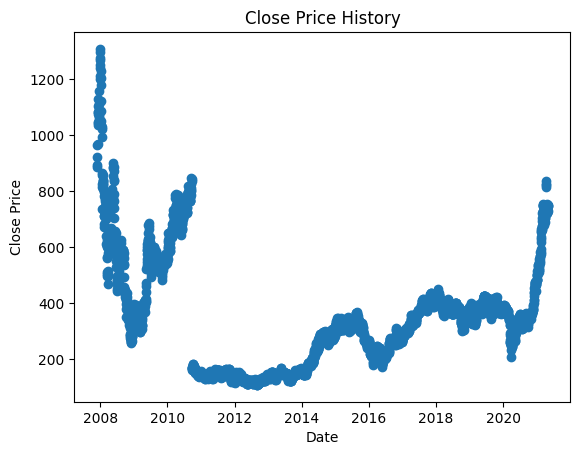

In [25]:
#Visualize the closing price history
plt.scatter(data['Date'], data['Close'])
plt.title("Close Price History")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.plot()

### LSTM are sensitive to the scale of the data. so we apply MinMax scaler

In [26]:
scaler = MinMaxScaler(feature_range=(0,1))
data1 = scaler.fit_transform(np.array(data1).reshape(-1, 1))

In [27]:
data1.shape

(3322, 1)

In [28]:
print(data1)

[[0.71274334]
 [0.65521697]
 [0.64712993]
 ...
 [0.53211889]
 [0.53253575]
 [0.5186127 ]]


In [29]:
#Splitting dataset into train and test set
training_size = int(len(data1)*0.7)
test_size = len(data1) - training_size
train_data, test_data = data1[0:training_size,:], data1[training_size:len(data1),:1]

In [30]:
training_size, test_size

(2325, 997)

In [31]:
len(train_data), len(test_data)

(2325, 997)

In [32]:
train_data

array([[0.71274334],
       [0.65521697],
       [0.64712993],
       ...,
       [0.17620576],
       [0.18158323],
       [0.18708575]])

In [33]:
test_data

array([[0.18174997],
       [0.18591855],
       [0.18621035],
       [0.17966568],
       [0.17883196],
       [0.18316729],
       [0.18558506],
       [0.18295886],
       [0.19296344],
       [0.19754888],
       [0.19383884],
       [0.19967485],
       [0.2033432 ],
       [0.21013798],
       [0.20838718],
       [0.20692818],
       [0.20551086],
       [0.20055025],
       [0.20000834],
       [0.2013006 ],
       [0.20546917],
       [0.18646046],
       [0.19313018],
       [0.19404727],
       [0.20009171],
       [0.18325066],
       [0.19371379],
       [0.19258827],
       [0.20109217],
       [0.20834549],
       [0.2109717 ],
       [0.21130518],
       [0.20934595],
       [0.20938764],
       [0.20997124],
       [0.20747009],
       [0.20959606],
       [0.20967944],
       [0.21009629],
       [0.2127225 ],
       [0.22160157],
       [0.22314394],
       [0.21839176],
       [0.21797491],
       [0.21464004],
       [0.2165159 ],
       [0.21384801],
       [0.213

In [34]:
# Convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ### i=0, 0,1,2,3,....,99
        dataX.append(a)
        dataY.append(dataset[i+time_step, 0])
    return np.array(dataX), np.array(dataY)

In [35]:
# reshape into X=t, t+1, t+2, t+3, and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [36]:
print(X_test)

[[0.18174997 0.18591855 0.18621035 ... 0.23123098 0.23431573 0.23510776]
 [0.18591855 0.18621035 0.17966568 ... 0.23431573 0.23510776 0.24602943]
 [0.18621035 0.17966568 0.17883196 ... 0.23510776 0.24602943 0.24773855]
 ...
 [0.25190712 0.25307433 0.26328734 ... 0.52507399 0.51469423 0.5191963 ]
 [0.25307433 0.26328734 0.27529284 ... 0.51469423 0.5191963  0.53453666]
 [0.26328734 0.27529284 0.27329193 ... 0.5191963  0.53453666 0.53211889]]


In [37]:
print(X_train.shape), print(y_train.shape)

(2224, 100)
(2224,)


(None, None)

In [38]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)


In [39]:
### create the stacked LSTM model
import tensorflow as tf
from tensorflow.keras.models import Sequential    
from tensorflow.keras.layers import Dense, LSTM

In [40]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(100, 1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

C:\Users\shyam\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [41]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 50)        │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [42]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=64, verbose=1)

Epoch 1/100


35/35 ━━━━━━━━━━━━━━━━━━━━ 11s 167ms/step - loss: 0.0118 - val_loss: 6.2004e-04
Epoch 2/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 143ms/step - loss: 0.0015 - val_loss: 5.1079e-04
Epoch 3/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 126ms/step - loss: 0.0017 - val_loss: 4.8638e-04
Epoch 4/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 123ms/step - loss: 0.0010 - val_loss: 0.0013
Epoch 5/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 116ms/step - loss: 0.0013 - val_loss: 4.7154e-04
Epoch 6/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 117ms/step - loss: 0.0014 - val_loss: 3.6877e-04
Epoch 7/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 157ms/step - loss: 7.2085e-04 - val_loss: 3.0529e-04
Epoch 8/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 6s 185ms/step - loss: 9.4629e-04 - val_loss: 3.7464e-04
Epoch 9/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 146ms/step - loss: 6.0340e-04 - val_loss: 4.0795e-04
Epoch 10/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 139ms/step - loss: 0.0012 - val_loss: 2.9039e-04
Epoch 11/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 139ms/step - loss: 7.2064e-04 - val_loss: 4.2843e

In [43]:
### Lets Do the prediction and check performance metrics
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step


In [44]:
### Transformback to original form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [45]:
### Calculate RMSE performance metrics
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train, train_predict))

351.62840515224815

In [46]:
### Test Data RMSE
math.sqrt(mean_squared_error(y_test, test_predict))

403.1469726367383

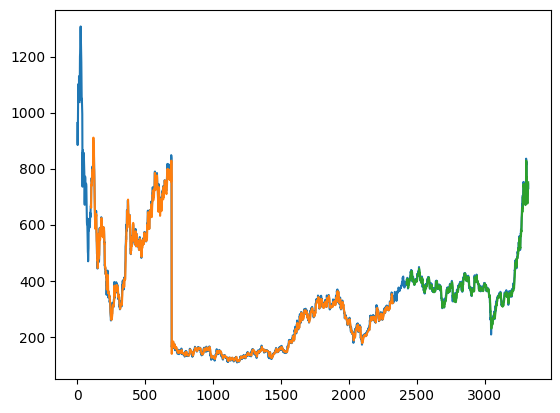

In [47]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(data1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(data1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(data1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(data1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [48]:
len(test_data)

997

In [49]:
x_input=test_data[897:].reshape(1,-1)
x_input.shape

(1, 100)

In [50]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [51]:
temp_input

[0.27329192546583847,
 0.28821543207303346,
 0.30305556713493687,
 0.29626078619367213,
 0.2967193296927758,
 0.3026387094084789,
 0.29872024677977405,
 0.29930384759681516,
 0.30659885780982954,
 0.30643211471924636,
 0.29992913418650213,
 0.2962191004210263,
 0.28033682104297797,
 0.30067947809412643,
 0.3024302805452499,
 0.3089332610779941,
 0.31310183834257366,
 0.3129767810246362,
 0.3146442119304681,
 0.31326858143315683,
 0.3300262620367669,
 0.325899370544833,
 0.32635791404393677,
 0.3241485680937096,
 0.33836341656592606,
 0.34098962024261115,
 0.33377798157488847,
 0.33619575638834465,
 0.357372128892409,
 0.35762224352828387,
 0.3501188044520406,
 0.3397390470632373,
 0.35416232439868267,
 0.3756721830839135,
 0.36654299887448416,
 0.35666347075743043,
 0.34653382800450205,
 0.3425319938305057,
 0.3427404226937346,
 0.33490349743632497,
 0.3624577931551961,
 0.36916920255116925,
 0.3769227562632873,
 0.3838425945224895,
 0.3826337071157614,
 0.3952228104547917,
 0.39513943

In [52]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.5228843]
101
1 day input [0.28821543 0.30305557 0.29626079 0.29671933 0.30263871 0.29872025
 0.29930385 0.30659886 0.30643211 0.29992913 0.2962191  0.28033682
 0.30067948 0.30243028 0.30893326 0.31310184 0.31297678 0.31464421
 0.31326858 0.33002626 0.32589937 0.32635791 0.32414857 0.33836342
 0.34098962 0.33377798 0.33619576 0.35737213 0.35762224 0.3501188
 0.33973905 0.35416232 0.37567218 0.366543   0.35666347 0.34653383
 0.34253199 0.34274042 0.3349035  0.36245779 0.3691692  0.37692276
 0.38384259 0.38263371 0.39522281 0.39513944 0.39088749 0.40339322
 0.42402768 0.43332361 0.4406603  0.45666764 0.46358748 0.45479178
 0.4717162  0.46187836 0.46454625 0.49714452 0.47346701 0.48764017
 0.51065071 0.51844595 0.53728792 0.53436992 0.53391138 0.53587061
 0.53136854 0.51702864 0.50944183 0.50802451 0.48376339 0.47659344
 0.48209596 0.51181792 0.52569928 0.4992705  0.48376339 0.49610238
 0.50235525 0.49556047 0.52378173 0.52878403 0.60656968 0.5892284
 0.59610655 0.59660678 0.53078494 0.

In [55]:
day_new = np.arange(1, 101)
day_pred = np.arange(101, 131)

In [53]:
len(data1)

3322

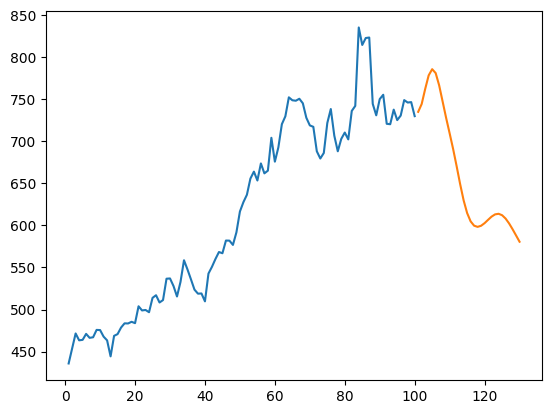

In [56]:
plt.plot(day_new, scaler.inverse_transform(data1[3222:]))
plt.plot(day_pred, scaler.inverse_transform(lst_output))

### ***Output: Above orange curve represents prediction of next 30 days***

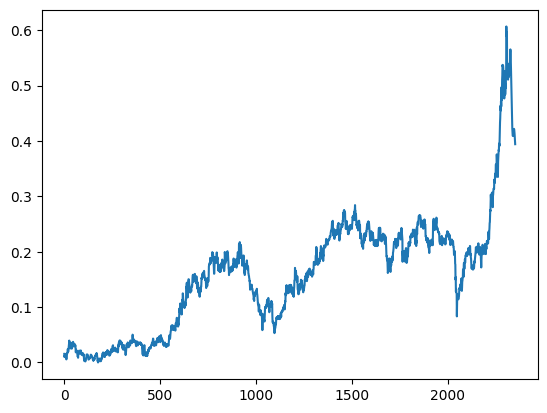

In [57]:
data2 = data1.tolist()
data2.extend(lst_output)
plt.plot(data2[1000:])